# Station Plot

In [29]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from metpy.calc import reduce_point_density
from metpy.calc import wind_components
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import add_metpy_logo, current_weather, nws_layout, simple_layout, sky_cover, StationPlot, StationPlotLayout
from metpy.units import units

### The Setup
First read in the data. We use pan

In [30]:
df = metar.text_file_parse(get_test_data('metar_20190701_1200.txt', as_file_obj=False))

In [31]:
# Setup the projection 
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])

point_locs = proj.transform_points(ccrs.PlateCarree(), df['longitude'].values, df['latitude'].values)
df = df[reduce_point_density(point_locs, 300000.)]

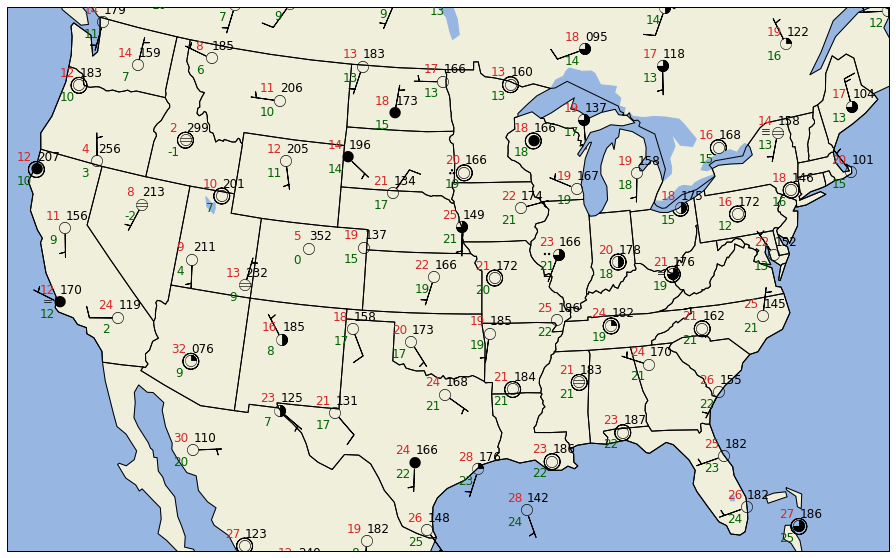

In [32]:
plt.rcParams['savefig.dpi'] = 255

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Set the plot bounds
ax.set_extent((-120, -73, 23, 50))

#
# Here's the actual station plot
#

stationplot = StationPlot(ax, df['longitude'].values, df['latitude'].values, clip_on=True,
                          transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature in the top lefthand corner
stationplot.plot_parameter('NW', df['air_temperature'].values, color='tab:red')

# Plot the dewpoint in the bottom lefthand corner
stationplot.plot_parameter('SW', df['dew_point_temperature'].values, color='darkgreen')

# Plot Sea-Level Pressure
stationplot.plot_parameter('NE', df['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot cloud cover
stationplot.plot_symbol('C', df['cloud_coverage'].values, sky_cover)

# Plot the current weather
stationplot.plot_symbol('W', df['present_weather'].values, current_weather)

# Plot the winds
stationplot.plot_barb(df['eastward_wind'].values, df['northward_wind'].values)

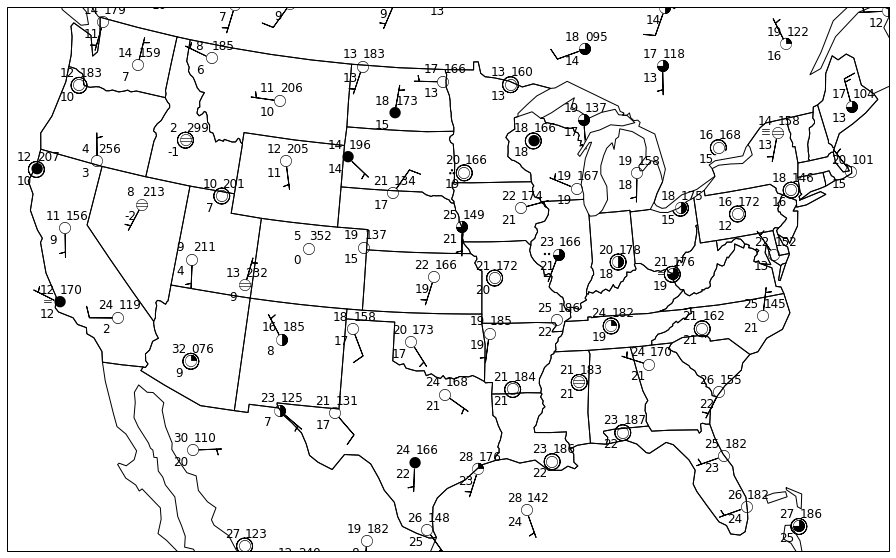

In [34]:
plt.rcParams['savefig.dpi'] = 255

# Create the figure and an axes set to the projection.
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable.
ax.add_feature(cfeature.LAND, color='white')
ax.add_feature(cfeature.OCEAN, color='white')
ax.add_feature(cfeature.LAKES, color='white')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

# Set the plot bounds
ax.set_extent((-120, -73, 23, 50))

#
# Here's the actual station plot
#

stationplot = StationPlot(ax, df['longitude'].values, df['latitude'].values, clip_on=True,
                          transform=ccrs.PlateCarree(), fontsize=12)

simple_layout.plot(stationplot, df)
#nws_layout.plot(stationplot, df)
plt.savefig('test.png', dpi=400)